## SQL-challenge: Employee Database

#### Dependencies and Setup

In [1]:
import psycopg2
import sys, os
import numpy as np
import pandas as pd
import example_psql as creds
import pandas.io.sql as psql
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#### Load PSQL DataBase

In [2]:
# Set up a connection to the postgres server.
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
+" password="+ creds.PGPASSWORD
conn=psycopg2.connect(conn_string)
print(f"PostgreSQL Database {creds.PGDATABASE} is connected!")

# Create a cursor object
cursor = conn.cursor()

PostgreSQL Database sql_challenge is connected!


#### Reading DataSet from DataBase

In [3]:
def load_data(schema='public', table='employees', query=None):
    if query == None:
        sql_command = "SELECT * FROM {}.{};".format(str(schema), str(table))
    else: sql_command = query
    print ('Query:',sql_command)
    # Load the data
    data = pd.read_sql(sql_command, conn)
    print('Data shape:',data.shape)
    return (data)

In [4]:
# Loading the Employees Dataset form PostrgreSQL Database
empl_data = load_data()
empl_data.head()

Query: SELECT * FROM public.employees;
Data shape: (300024, 7)


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [5]:
salary_request = """
    SELECT e.first_name, e.last_name, e.sex, d.dept_name, t.title, s.salary
    FROM employees AS e
    INNER JOIN salary AS s USING (emp_no)
    INNER JOIN dept_employees USING (emp_no)
    INNER JOIN departments AS d USING (dept_no)
    INNER JOIN title AS t ON e.emp_title_id = t.title_id;
    """
sal_data = load_data(query=salary_request)
sal_data.head()

Query: 
    SELECT e.first_name, e.last_name, e.sex, d.dept_name, t.title, s.salary
    FROM employees AS e
    INNER JOIN salary AS s USING (emp_no)
    INNER JOIN dept_employees USING (emp_no)
    INNER JOIN departments AS d USING (dept_no)
    INNER JOIN title AS t ON e.emp_title_id = t.title_id;
    
Data shape: (331603, 6)


,first_name,last_name,sex,dept_name,title,salary
0,Kyoichi,Maliniak,M,Human Resources,Staff,78228
1,Duangkaew,Piveteau,F,Production,Engineer,72488
2,Duangkaew,Piveteau,F,Quality Management,Engineer,72488
3,Mary,Sluis,F,Customer Service,Staff,42365
4,Eberhardt,Terkki,M,Human Resources,Senior Staff,40000


#### Data Analysis and Visualization

In [6]:
sal_data['salary'].describe()

count    331603.000000
mean      52972.225432
std       14299.003001
min       40000.000000
25%       40000.000000
50%       48691.000000
75%       61765.000000
max      129492.000000
Name: salary, dtype: float64

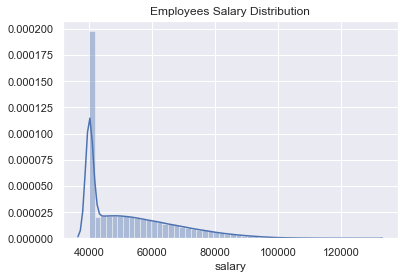

In [7]:
_ = sns.distplot(sal_data['salary'])
_ = plt.title('Employees Salary Distribution', fontsize=12)

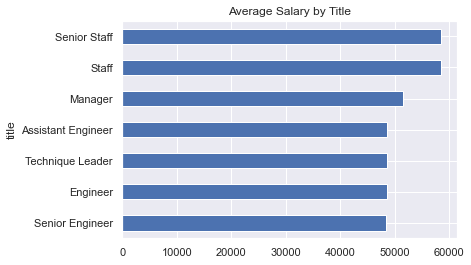

In [15]:
title_data = sal_data.groupby('title')['salary'].mean().sort_values()
_ = title_data.plot(kind='barh')
_ = plt.title('Average Salary by Title', fontsize=12)

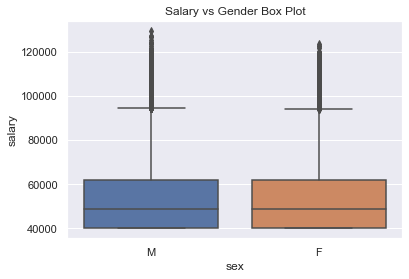

In [9]:
_ = sns.boxplot(sal_data['sex'], sal_data['salary'])
_ = plt.title('Salary vs Gender Box Plot', fontsize=12)

In [10]:
managers_request = """
    SELECT e.first_name, e.last_name, dm.dept_no, d.dept_name, s.salary
    FROM dept_managers AS dm
    INNER JOIN departments AS d USING (dept_no)
    INNER JOIN employees AS e USING (emp_no)
    INNER JOIN salary AS s USING (emp_no);
    """
man_data = load_data(query=managers_request)
man_data   

Query: 
    SELECT e.first_name, e.last_name, dm.dept_no, d.dept_name, s.salary
    FROM dept_managers AS dm
    INNER JOIN departments AS d USING (dept_no)
    INNER JOIN employees AS e USING (emp_no)
    INNER JOIN salary AS s USING (emp_no);
    
Data shape: (24, 5)


,first_name,last_name,dept_no,dept_name,salary
0,Margareta,Markovitch,d001,Marketing,71166
1,Vishwani,Minakawa,d001,Marketing,69941
2,Ebru,Alpin,d002,Finance,60026
3,Isamu,Legleitner,d002,Finance,52070
4,Shirish,Ossenbruggen,d003,Human Resources,48291
5,Karsten,Sigstam,d003,Human Resources,40000
6,Krassimir,Wegerle,d004,Production,42093
7,Rosine,Cools,d004,Production,50365
8,Shem,Kieras,d004,Production,40000
9,Oscar,Ghazalie,d004,Production,40000


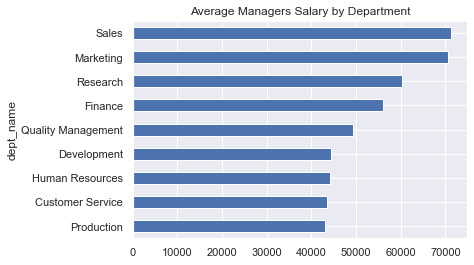

In [13]:
title_man_data = man_data.groupby('dept_name')['salary'].mean().sort_values()
_ = title_man_data.plot(kind='barh')
_ = plt.title('Average Management Salary by Department', fontsize=12)

In [14]:
cursor.close()
conn.close()